In [4]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.8/585.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.3 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Datasets

## Direct Search Posts

In [7]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [8]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [9]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

## Filtered Search

In [10]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [11]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

# Mix Search

In [12]:
reddit_global_results_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/GlobalResults.csv'

reddit_global_res_posts = pd.read_csv(reddit_global_results_dir)
reddit_global_res_posts = reddit_global_res_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_global_res_posts.columns)

Index(['full_text', 'Checked', 'Manual Evaluation',
       'relvance unbalanced model', 'RELEVANCE _ UNBALANCED MODEL',
       'relvance balanced model', 'RELEVANCE _ BALANCED MODEL', 'relevance',
       'RELEVANCE NIST MODEL', 'Related'],
      dtype='object')


In [13]:
reddit_global_res_posts.head()

,full_text,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


In [14]:
reddit_global_posts_checked = reddit_global_res_posts[reddit_global_res_posts.Checked == 1]
reddit_global_posts_unchecked = reddit_global_res_posts[reddit_global_res_posts.Checked == 0]

In [15]:
reddit_global_posts_checked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.head()
reddit_global_posts_checked.head()

<ipython-input-15-453b93877dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_global_posts_checked.rename(columns={'full_text' : 'content'}, inplace=True)
<ipython-input-15-453b93877dac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_global_posts_unchecked.rename(columns={'full_text' : 'content'}, inplace=True)


,content,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


## Team Analysis

In [16]:
pip install gspread pandas oauth2client


In [17]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [18]:
from google.colab import auth
auth.authenticate_user()

In [19]:
reddit_posts3 = 'https://docs.google.com/spreadsheets/d/1JkmcuuKJsipjHyK9HDJ64xbGE-zIz2rB7KyloeSvnuI/edit#gid=2102769814'
reddit_posts2 = 'https://docs.google.com/spreadsheets/d/1NiJYJoIgAeKkYuGY338MtMmuSdjlsgisT_zDA8b_WKc/edit#gid=884260924'
reddit_posts1 = 'https://docs.google.com/spreadsheets/d/14bc3_VPW0I8Pcf40ZF78BcHI1AoAZ3nhdZdqRnNvBEY/edit#gid=1305219599'
reddit_posts4 = 'https://docs.google.com/spreadsheets/d/1hQOwgRf7jIWLmvksr1v_BmdwOJap1PrKoSmrs5-HS78/edit#gid=416251711'
reddit_posts5 = 'https://docs.google.com/spreadsheets/d/1wuUscml8_YykP1dC802BpcBMD2nGFxHTywaWDCTh0Tk/edit#gid=787134330'
reddit_posts6 = 'https://docs.google.com/spreadsheets/d/1BlDYry6Q2VueejyuUn7kncRJmPmrqKgYKO9yO_ZQtfU/edit#gid=773392604'
reddit_posts7 = 'https://docs.google.com/spreadsheets/d/1OZ9tqkb_dnl69SRbLfcifmqxuIf415drkeuDqYNUg9o/edit#gid=1806656778'
reddit_posts8 = 'https://docs.google.com/spreadsheets/d/1iaftVk5DqCsUF93712hVJke3OL_1WTziaIlDPwaaTBs/edit#gid=422591794'

In [20]:
import os

current_directory = os.getcwd()
print(current_directory)

/content


In [21]:
nuovi_nomi_colonne = ['content', 'keyword', 'keyword type', 'Checked', 'Manual Evaluation']


In [23]:
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)


# WORKSHEET 1

worksheet1 = gs.open_by_url(reddit_posts1).sheet1

rows1 = worksheet1.get_all_values()

df1 = pd.DataFrame(rows1)
df1 = df1.iloc[1:, 1:]
df1.columns = nuovi_nomi_colonne

print(df1)


# WORKSHEET 2

worksheet2 = gs.open_by_url(reddit_posts2).sheet1

rows2 = worksheet2.get_all_values()

df2 = pd.DataFrame(rows2)
df2 = df2.iloc[1:, 1:]
df2.columns = nuovi_nomi_colonne

# WORKSHEET 3

worksheet3 = gs.open_by_url(reddit_posts3).sheet1

rows3 = worksheet3.get_all_values()

df3 = pd.DataFrame(rows3)
df3 = df3.iloc[1:, 1:]
df3.columns = nuovi_nomi_colonne

print(df3)

# WORKSHEET 4

worksheet4 = gs.open_by_url(reddit_posts4).sheet1

rows4 = worksheet4.get_all_values()

df4 = pd.DataFrame(rows4)
df4 = df4.iloc[1:, 1:]
df4.columns = nuovi_nomi_colonne

print(df4)

# WORKSHEET 5

worksheet5 = gs.open_by_url(reddit_posts5).sheet1

rows5 = worksheet5.get_all_values()

df5 = pd.DataFrame(rows5)
df5 = df5.iloc[1:, 1:]
df5.columns = nuovi_nomi_colonne

# WORKSHEET 6

worksheet6 = gs.open_by_url(reddit_posts6).sheet1

rows6 = worksheet6.get_all_values()

df6 = pd.DataFrame(rows6)
df6 = df6.iloc[1:, 1:]
df6.columns = nuovi_nomi_colonne

# WORKSHEET 7

worksheet7 = gs.open_by_url(reddit_posts7).sheet1

rows7 = worksheet7.get_all_values()

df7 = pd.DataFrame(rows5)
df7 = df7.iloc[1:, 1:]
df7.columns = nuovi_nomi_colonne

# WORKSHEET 8

worksheet8 = gs.open_by_url(reddit_posts8).sheet1

rows8 = worksheet8.get_all_values()

df8 = pd.DataFrame(rows8)
df8 = df8.iloc[1:, 1:]
df8.columns = nuovi_nomi_colonne

df_reddit_collection = pd.concat([df3, df8, df7, df6, df5, df4, df2, df1 ]).reset_index(drop=True)

df_reddit_collection

                                                content          keyword  \
1     Download backups for local edit. Hey,\n\nTryin...       downloader   
2     Deco m9 Blinking red when switched from router...     network http   
3     openCV can't find image when inside a folder. ...     Start Folder   
4     Anyone here use Pydroid?. I'm having trouble r...       downloader   
5     Can someone just give me every internet help t...       downloader   
...                                                 ...              ...   
4493  Choosing between cloud company vs hospital?. I...  creates service   
4494  PyBroker - Algotrading in Python with Machine ...       downloader   
4495  Apparent minor network differences after switc...       downloader   
4496  Windows Update Errors and Corrupted Files. PC:...       downloader   
4497  Cheap Homelab Server Build?. Hey guys,\n\nAs t...    document open   

      keyword type Checked Manual Evaluation  
1        behaviour       1              

,content,keyword,keyword type,Checked,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,creates service,behaviour,1,0
1,How a fake Devil May Cry file (nearly) infecte...,downloader,malware type,1,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",network http post,behaviour,1,0
3,Get URLs to redirect automatically - URL Short...,https urls,behaviour,1,0
4,"Just got this, what do you think, legit?. Subj...",locates browser,behaviour,1,0
...,...,...,...,...,...
39377,Choosing between cloud company vs hospital?. I...,creates service,behaviour,0,0
39378,PyBroker - Algotrading in Python with Machine ...,downloader,behaviour,0,0
39379,Apparent minor network differences after switc...,downloader,malware type,0,0
39380,Windows Update Errors and Corrupted Files. PC:...,downloader,malware type,0,0


In [24]:
df_reddit_collection['Checked'] = pd.to_numeric(df_reddit_collection['Checked'], errors='coerce')
df_reddit_collection['Manual Evaluation'] = pd.to_numeric(df_reddit_collection['Manual Evaluation'], errors='coerce')
df_reddit_collection['Checked'] = df_reddit_collection['Checked'].fillna(0).astype('int64')
df_reddit_collection['Manual Evaluation'] = df_reddit_collection['Manual Evaluation'].fillna(0).astype('int64')

In [25]:
df_checked_reddit_collection = df_reddit_collection [df_reddit_collection['Checked'] == 1]
df_unchecked_reddit_collection = df_reddit_collection[df_reddit_collection['Checked'] == 0]

print(f'Checked : {len(df_checked_reddit_collection)}')
print(f'Unchecked : {len(df_unchecked_reddit_collection)}')
print(f'Total : {len(df_unchecked_reddit_collection) + len(df_checked_reddit_collection)}')


Checked : 8517
Unchecked : 30865
Total : 39382


# Union


In [26]:
reddit_posts_checked = pd.concat([ df_checked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_checked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_checked.head()

,content,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0


In [27]:
reddit_posts_unchecked = pd.concat([df_unchecked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_unchecked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_unchecked.head()

,content,Manual Evaluation
3849,AlloyDB and DBT for PostgreSQL! Where does thi...,0
3850,Twrp cant see update file. Hi ive recently ins...,0
3851,Netgate 2100 - PFSense + Individual Network In...,0
3852,Noob that needs help with StS VPN - Can ping g...,0
3853,I want to run an Instagram account without my ...,0


In [28]:
reddit_posts_checked.rename(columns={  'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)
reddit_posts_unchecked.rename(columns={'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)

In [29]:
reddit_posts_checked = reddit_posts_checked.drop_duplicates().reset_index(drop = True)
reddit_posts_checked

,full_text,Related
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0
...,...,...
10818,"Any way to disable ""Handsfree Telephony"" servi...",0
10819,Are self-driving cars already safer than human...,0
10820,Question about setting up a Corinna class insi...,0
10821,20230626: US troops deployed in Peru for joint...,0


In [30]:
reddit_posts_unchecked = reddit_posts_unchecked.drop_duplicates().reset_index(drop = True)
reddit_posts_unchecked

,full_text,Related
0,AlloyDB and DBT for PostgreSQL! Where does thi...,0
1,Twrp cant see update file. Hi ive recently ins...,0
2,Netgate 2100 - PFSense + Individual Network In...,0
3,Noob that needs help with StS VPN - Can ping g...,0
4,I want to run an Instagram account without my ...,0
...,...,...
26647,ReconAfrica Annual General Meeting - Inaugural...,0
26648,Cannot find cause of blocked network traffic. ...,0
26649,Cant open gta 5 or any rockstar title or even ...,0
26650,What's something you learned after years of be...,0


tokenize + embeddings

In [31]:
# pip install --upgrade tensorflow

In [32]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 35.7 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 42.0.2
    Uninstalling cryptography-42.0.2:
      Successfully uninstalled cryptography-42.0.2


In [33]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from keras_tuner.tuners import RandomSearch


In [35]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [36]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [37]:
df = pd.concat([reddit_posts_unchecked])
df = df.drop_duplicates(subset=['full_text']).reset_index(drop = True)
(df.head())

,full_text,Related
0,AlloyDB and DBT for PostgreSQL! Where does thi...,0
1,Twrp cant see update file. Hi ive recently ins...,0
2,Netgate 2100 - PFSense + Individual Network In...,0
3,Noob that needs help with StS VPN - Can ping g...,0
4,I want to run an Instagram account without my ...,0


<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

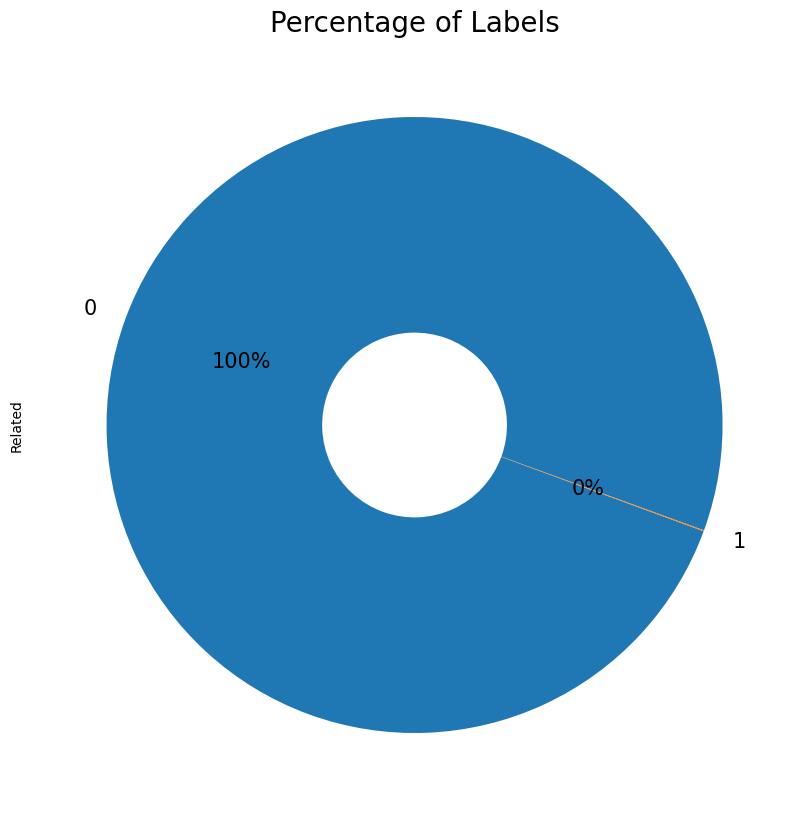

In [38]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## PREPROCESSING
#### Remove links and punctuation

In [39]:
import re

def preprocessing(text):
    text = re.sub(r'http\S+', ' ', text)

    return text

text = "Hey, this link https://www.example.com !?"
new_text = preprocessing(text)

new_text

'Hey, this link   !?'

In [40]:
df['original_text'] = df['full_text']

df['full_text'] = df['full_text'].apply(preprocessing)
df['full_text']

0        AlloyDB and DBT for PostgreSQL! Where does thi...
1        Twrp cant see update file. Hi ive recently ins...
2        Netgate 2100 - PFSense + Individual Network In...
3        Noob that needs help with StS VPN - Can ping g...
4        I want to run an Instagram account without my ...
                               ...                        
26639    ReconAfrica Annual General Meeting - Inaugural...
26640    Cannot find cause of blocked network traffic. ...
26641    Cant open gta 5 or any rockstar title or even ...
26642    What's something you learned after years of be...
26643    So, do I now need seperate Domains for all my ...
Name: full_text, Length: 26644, dtype: object

LASER

In [41]:
!pip install torch==2.1.0

In [42]:
!pip install -q ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.4 MB/s eta 0:00:00


****LASER Encoders****

laser_encoders is the official Python package for the Facebook LASER library. It provides a simple and convenient way to use LASER embeddings in Python. It allows you to calculate multilingual sentence embeddings using the LASER toolkit. These embeddings can be utilized for various natural language processing tasks, including document classification, bitext filtering, and mining.

This encodes each of the strings as a LASER embedding (1024 dimentional vector)

For users familiar with the earlier version of LASER, you might have encountered the laserembeddings package. This package primarily dealt with LASER-1 model embeddings.

For the latest LASER-2,3 models, use the newly introduced laser_encoders package, which offers better performance and support for a wider range of languages.


In [43]:
!pip install -q laserembeddings==1.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.8/859.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 770.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 54.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires t

In [44]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.6 MB/s eta 0:00:00


In [45]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote


  Preparing metadata (setup.py) ... done
  Created wheel for fastcache: filename=fastcache-1.1.0-cp310-cp310-linux_x86_64.whl size=42960 sha256=b1b62a05291067f8a38675e2554ab41ecb55a97d5b3d09b76f1b971c45d905f8
  Stored in directory: /root/.cache/pip/wheels/f5/ea/fc/eebb4e5d80ccd0da9db419de1e9b156c9c2875b5d394727aff
Successfully built fastcache


In [46]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [47]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [48]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()

    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)

    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)

    return embedding

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, KFold, cross_validate

import tensorflow as tf
import tensorflow_addons as tfa

sns.set(style='white', context='notebook', palette='deep')


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [50]:
df = df.sample(n=20000, random_state=42)

In [51]:
X = laser_encode(df['full_text'])
y = df['Related']
text = df[['original_text', 'full_text']]

In [52]:
df['original_text'].shape

(20000,)

In [53]:
X[0].shape

(1024,)

In [54]:
X

array([[0.01063263, 0.00574474, 0.01323843, ..., 0.02205602, 0.01184695,
        0.03431676],
       [0.01515447, 0.01004094, 0.00107038, ..., 0.0280116 , 0.01383466,
        0.01741148],
       [0.00670475, 0.00331398, 0.01671631, ..., 0.01073266, 0.01530788,
        0.01552458],
       ...,
       [0.01530084, 0.00467629, 0.02155065, ..., 0.02255931, 0.00561598,
        0.01015869],
       [0.01813712, 0.01156727, 0.00410781, ..., 0.01426511, 0.02390902,
        0.03033417],
       [0.0055881 , 0.01479067, 0.00550449, ..., 0.01978885, 0.01427634,
        0.00826234]], dtype=float32)

In [55]:
savings = pd.DataFrame()

savings['Related'] = y
savings['original_text'] = text['original_text']
savings['full_text'] = text['full_text']

savings

,Related,original_text,full_text
9710,0,NEED HELP With Router/Bridge Setup in Shop. So...,NEED HELP With Router/Bridge Setup in Shop. So...
8121,0,Old laptop as a dedicated media streaming pc. ...,Old laptop as a dedicated media streaming pc. ...
1610,0,Tenda Wireless Adapter giving poor speed. It's...,Tenda Wireless Adapter giving poor speed. It's...
12326,0,Accidentally deleted Ethernet from Service opt...,Accidentally deleted Ethernet from Service opt...
19171,0,"How to get an ""Elementor like"" design using Gu...","How to get an ""Elementor like"" design using Gu..."
...,...,...,...
14645,0,Help! My PC is the only device with a slow int...,Help! My PC is the only device with a slow int...
15706,0,Is this website harmful?. I downloaded a book ...,Is this website harmful?. I downloaded a book ...
18445,0,"Is there anyway to fix ""CVE-2023-28531 affects...","Is there anyway to fix ""CVE-2023-28531 affects..."
3775,0,Microsoft SQL Server -> Excel export via front...,Microsoft SQL Server -> Excel export via front...


In [56]:
savings['embeddings'] = ''

#print(len(savings))

for i in range(len(savings) ):

  j = savings.index[i]

  #print(f'i: {i} ; j: {j}')

  savings.at[j, 'embeddings'] = X[i]

num_righe = len(savings)

savings

,Related,original_text,full_text,embeddings
9710,0,NEED HELP With Router/Bridge Setup in Shop. So...,NEED HELP With Router/Bridge Setup in Shop. So...,"[0.010632626, 0.0057447413, 0.013238433, 0.016..."
8121,0,Old laptop as a dedicated media streaming pc. ...,Old laptop as a dedicated media streaming pc. ...,"[0.015154466, 0.010040942, 0.0010703799, 0.029..."
1610,0,Tenda Wireless Adapter giving poor speed. It's...,Tenda Wireless Adapter giving poor speed. It's...,"[0.006704749, 0.0033139759, 0.016716305, 0.021..."
12326,0,Accidentally deleted Ethernet from Service opt...,Accidentally deleted Ethernet from Service opt...,"[0.03719453, 0.00892703, 0.0035985962, 0.00980..."
19171,0,"How to get an ""Elementor like"" design using Gu...","How to get an ""Elementor like"" design using Gu...","[-1.071673e-05, 0.01284809, 0.006776772, 0.020..."
...,...,...,...,...
14645,0,Help! My PC is the only device with a slow int...,Help! My PC is the only device with a slow int...,"[0.010815506, 0.005324549, 0.0027136574, 0.022..."
15706,0,Is this website harmful?. I downloaded a book ...,Is this website harmful?. I downloaded a book ...,"[0.014593848, 0.0035541542, -0.0018466976, 0.0..."
18445,0,"Is there anyway to fix ""CVE-2023-28531 affects...","Is there anyway to fix ""CVE-2023-28531 affects...","[0.015300844, 0.004676292, 0.021550646, 0.0264..."
3775,0,Microsoft SQL Server -> Excel export via front...,Microsoft SQL Server -> Excel export via front...,"[0.018137116, 0.011567273, 0.0041078124, 0.018..."


In [57]:
path_text = "/content/gdrive/MyDrive/RedditDataset/ActiveLearning.csv"




In [58]:
path_X = "/content/gdrive/MyDrive/RedditDataset/ActiveLearning_embeddings.csv"



In [59]:
# Save X's embeddings train, test and val to CSV
import numpy as np
np.savetxt(path_X, X, delimiter=',')


In [60]:
# Save df to CSV

savings.to_csv(path_text)

In [61]:
savings.at[9710, 'embeddings'].shape

(1024,)

In [62]:
XXX = np.random.rand(20000, 1024)

# Iteriamo su ogni cella della colonna 'embeddings' e aggiorniamo l'array X
for i in range(len(savings)):
    j = savings.index[i]
    XXX[i] = savings.at[j, 'embeddings']

XXX.shape

XXX

array([[0.01063263, 0.00574474, 0.01323843, ..., 0.02205602, 0.01184695,
        0.03431676],
       [0.01515447, 0.01004094, 0.00107038, ..., 0.0280116 , 0.01383466,
        0.01741148],
       [0.00670475, 0.00331398, 0.01671631, ..., 0.01073266, 0.01530788,
        0.01552458],
       ...,
       [0.01530084, 0.00467629, 0.02155065, ..., 0.02255931, 0.00561598,
        0.01015869],
       [0.01813712, 0.01156727, 0.00410781, ..., 0.01426511, 0.02390902,
        0.03033417],
       [0.0055881 , 0.01479067, 0.00550449, ..., 0.01978885, 0.01427634,
        0.00826234]])